# PROYECTO SÓLIDO EN REVOLUCIÓN 
##### - INVOLUCRA MÁXIMOS Y MÍNIMOS DE UNA FUNCIÓN
##### - AJUSTE DE CURVAS 
##### - ENCONTRAR DATOS OCULTOS
##### - UTILIZAR LAS FÓRMULAS PARA SÓLIDOS DE REVOLUCIÓN 

In [18]:
#IMPORTANDO LIBRERÍAS
import numpy as np 
import sympy as sym
import matplotlib.pyplot as plt 
%matplotlib inline 
sym.init_printing(use_latex='mathjax')

### Se tienen estos puntos para encontrar un perfil de una figura a moldear en un torno.

| PUNTOS   |    X     |    Y     |
| :------- | :------: | -------: |
| P0       |  0       | 0.164105 |
| P1       |  3       | 1.203    |
| P2       | 6.02564  | 0.5618   |
| P3       | 7.62     | 0.85     |

# Problema 1 
### Encontrar una función en base a los puntos de la tabla anterior


In [54]:
#ajuste de curvas
from matplotlib import pyplot, image, transforms
from scipy.interpolate import CubicSpline, interp1d, lagrange
%matplotlib inline

In [55]:
#x = np.loadtxt('Engranexy.txt', usecols=0)   
#fx = np.loadtxt('Engranexy.txt', usecols=1)
x = np.loadtxt('C:/Users/shang/Downloads/Engranexy.txt', usecols=0)   
fx = np.loadtxt('C:/Users/shang/Downloads/Engranexy.txt', usecols=1) 
n = len(x)
a = fx
print (x)
print(n)

[0.      3.      6.02564 7.62   ]
4


In [56]:
#Obtención de los coeficientes c, b y d
h = x[1:n] - x[0:(n-1)]
alpha = np.zeros(n)
for i in range(1, n-1):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])
l, m, z = np.zeros(n), np.zeros(n), np.zeros(n)
for i in range(1, n-1):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1]*m[i-1]
    m[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1]*z[i-1]) / l[i]
l[n-1] = 1
c, b, d = np.zeros(n), np.zeros(n), np.zeros(n)
for j in range(n-2, -1, -1):
    c[j] = z[j] - m[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2*c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

In [57]:
#Agrupamiento de Sj
S, X = [], []
for i in range(n-1):
    xx = np.linspace(x[i], x[i+1], 10) #arreglo del conjunto de divisiones de cada intervalo
    Sj = a[i] + b[i]*(xx-x[i]) + c[i]*(xx - x[i]) ** 2 + d[i]*((xx - x[i])**3) #resultado para cada Sj(xx)
    S.append(Sj.tolist())
    X.append(xx.tolist())
S = np.asarray(S).ravel() #Reacomodo matriz nxm a vector 1x(nm)
X = np.asarray(X).ravel()

In [58]:
#Funcion Predeterminada
cs = CubicSpline(x, fx)  #Funcion predeterminada para Trazadores Cúbicos
f = interp1d(x, fx)      #Funcion predeterminada para interpolación
f2 = interp1d(x, fx, kind='cubic') #Funcion predeterminada para interpolación cúbica
fL = lagrange(x, fx)  #Funcion predeterminada para interpolación Lagrange

In [59]:
#Interpolación de Lagrange
Fy = np.zeros(len(X))
for q in range(len(X)): #evaluacion del polinomio en cada valor del vector X
    fy = 0
    for k in range (n): #Obtención de coeficientes y evaluación de la productoria. 
        t=1
        for j in range (n):
            if j != k:
                t=t* ( (X[q]-x[j]) /(x[k]-x[j]) )
        fy+= t*fx[k]
    Fy[q] = fy #Resultado del polinomio para la variable X[q]

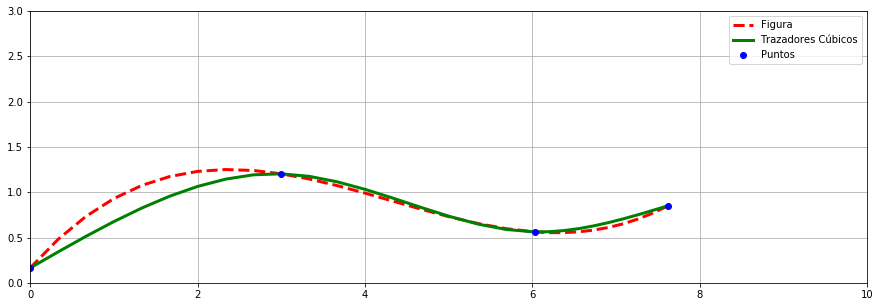

In [62]:

plt.figure(figsize = (15, 5))
plt.plot(X, Fy, 'r--', linewidth = 3.0, label = 'Figura') 
plt.plot(X, S, 'g-', linewidth = 3.0, label = 'Trazadores Cúbicos')
plt.plot(x, fx, 'bo', label = 'Puntos')
plt.legend(loc='best')
plt.xlim(0, 10)
plt.ylim(0,3 )
plt.grid()
plt.savefig('Figura.png')
plt.show()


###### Resolviendo la matriz se encuentra la función graficada  donde X, Y  son valores obtenidos de la tabla
$$\mathbf{j} = \left[\begin{array}
{rrr}
X0^3 & X0^2 & X0 &  1  \\
X1^3 & X1^2 & X1 &  1  \\
X2^3 & X2^2 & X2 &  1  \\
X3^3 & X3^2 & X3 &  1  
\end{array}\right]
$$

$$\mathbf{k} = \left[\begin{array}
{rrr}
a \\
b \\
c \\
d 
\end{array}\right]
$$


$$\mathbf{m} = \left[\begin{array}
{rrr}
Y0 \\
Y1 \\
Y2 \\
Y3 
\end{array}\right]
$$
###### *Resolvimos la operación de matrices
**$$ (j)x(k)=(m)$$**
###### *Sustituimos la matriz k*
$$f(x)=ax^3+bx^2+cx+d$$


# Problema 2  
#### *Se quiere moldear una figura en un torno, partiendo de un prisma rectangular. Si se conoce que el perfil de la figura es*:$$f(x)=0.023x^3-0.30288x^2+1.04509x+0.165405$$
1. Encuentra las dimensiones del prisma rectangular para que se gaste el menor material posible, se sabe que el largo de la figura es de 7.62 cm

2. Determine el volumen de la figura y del prisma rectangular


In [26]:
#DEFINIENDO LA FUNCIÓN
def f1(x):
    return ((0.0233*x**3)-(0.30288*x**2)+(1.04509*x)+(0.164105))
sym.var("x", real = True)
df1=sym.diff(f1(x),x)
df1

        2                      
0.0699⋅x  - 0.60576⋅x + 1.04509

In [27]:
#RESOLVIENDO DERIVADA 
df1=sym.diff(f1(x),x)
df1

        2                      
0.0699⋅x  - 0.60576⋅x + 1.04509

In [28]:
#ENCONTRANDO MÁXIMOS Y MÍNIMOS DE LA FUNCIÓN
c1=sym.solve(df1,x)
c1

[2.37752116756858, 6.28857325303228]

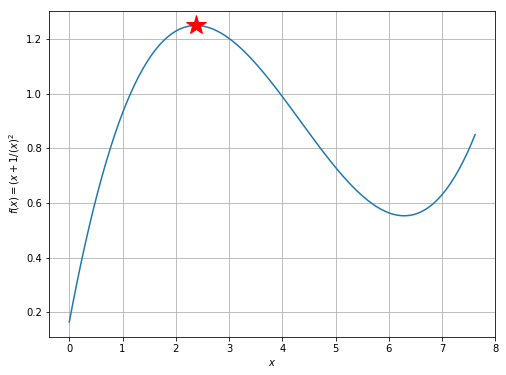

In [29]:
#GRÁFICA DEL PUNTO MÁXIMO, ES DECIR LA ALTURA MEDIA DEL PRISMA
plt.figure(figsize=(8,6))
xnum=np.linspace(0,7.62,100)
plt.plot(xnum,f1(xnum))
plt.xlabel('$x$')
plt.ylabel('$f(x)=(x+1/(x)^2$')
plt.plot(c1[0],f1(c1[0]),'*r', ms=20)
plt.grid()

In [30]:
#ENCONTRANDO H MEDIA
h_media=f1(c1[0])
h_media


1.24990020515968

In [31]:
#ENCONTRANDO ALTURA REAL, ADEMÁS DEL ANCHO REAL
h=2*f1(c1[0])
h

2.49980041031937

**R1=** Las dimensiones del prisma son las siguientes:
- 7.62 cm de base
- 2.4998...cm de ancho
- 2.4998... cm de altura

*Por lo tanto la altura y el ancho de la figura son de la misma dimensión*

El volumen del prisma está dado por la siguiente fórmula:
$$v=(h^2)(b)$$

*h= comprende el valor de la altura y el ancho de la figura*

*b= longuitud del prisma*

In [32]:
#DETERMINANDO EL VOLUMEN DE LA FIGURA
b=7.62
volumen_prisma=(h**2)*b
volumen_prisma

47.6173959367186

**R2=** El volumen del prisma es:
$$v=47.61739...cm^3$$

El volumen de la figura está determinando por la siguiente fórmula:
$$V= \pi \int_0^{7.62}  (0.023x^3-0.30288x^2+1.04509x+0.165405)^2$$


In [51]:
#ECONTRANDO LA INTEGRAL DE LA FUNCIÓN
def f2(x):
    return ((0.0233*x**3)-(0.30288*x**2)+(1.04509*x)+(0.164105))**2
sym.var("x", real = True)
integral=sym.integrate(f2(x),x),
integral

⎛                     7                6                  5                  4
⎝7.75557142857143e-5⋅x  - 0.002352368⋅x  + 0.02808749768⋅x  - 0.15635660635⋅x 

                      3                  2                    ⎞
 + 0.330934954433333⋅x  + 0.17150449445⋅x  + 0.026930451025⋅x,⎠

**R2=** *Evaluamos la integral con 7.62 que es la longuitud de la figura*
$$(\pi) V(7.62)=(0.023x^3-0.30288x^2+1.04509x+0.165405)^2$$
$$ V(7.62)=6.21(\pi)$$
$$ V=19.51 cm^3$$